<div style="text-align: right"> <b>[M1 info ML] Réduction de dimensions - 2020/2021</b> </div>
<div style="text-align: right"> <a href="mailto:mohamed.maouche@univ-lille.fr"> M. Maouche </a> </div>



Ce notebook contient le code qui a été utilisé pour le rendu.

---------------------------

In [45]:
import numpy as np
import pandas as pd
from time import time

import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.datasets import make_moons,make_s_curve,make_circles, make_swiss_roll, load_digits, load_iris
from sklearn.decomposition import PCA,KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE,SpectralEmbedding
from sklearn.utils import check_random_state

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Datasets

## Generique

In [2]:
npoints=1000

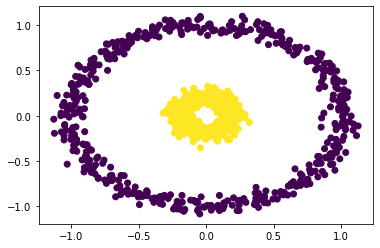

In [3]:
X_circle,y_circle = make_circles(npoints,noise=.05,factor=.2)
plt.scatter(X_circle[:,0],X_circle[:,1],c=y_circle)

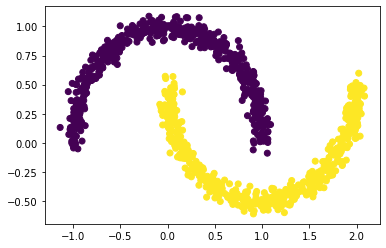

In [4]:
X_moon,y_moon = make_moons(npoints,noise=0.05)
plt.scatter(X_moon[:,0],X_moon[:,1],c=y_moon)

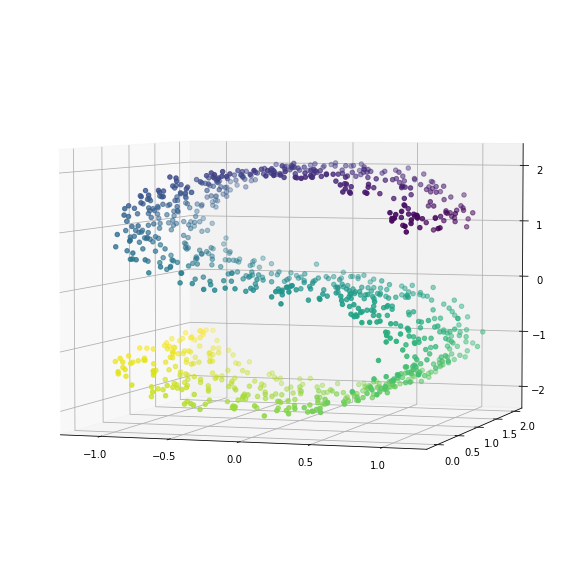

In [5]:
X_curve, y_curve = make_s_curve(npoints,noise=.05)
fig = plt.figure(figsize=(15, 8), constrained_layout=True)
ax = fig.add_subplot(projection='3d')
ax.scatter(X_curve[:,0],X_curve[:,1],X_curve[:,2],c=y_curve)
ax.view_init(4, -72)

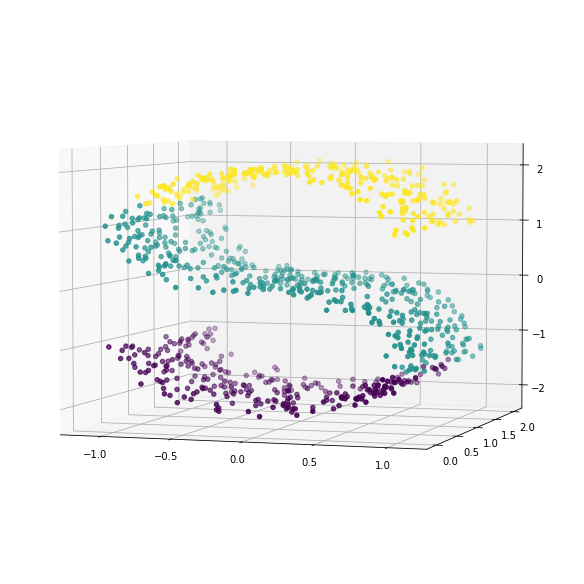

In [6]:
def s_curve_datasets(npoints,noise=.05):
    X_curve, y_curve = make_s_curve(npoints,noise=noise)
    y_curve2 = y_curve
    y_curve2 = np.where(y_curve > 2,0,y_curve2)
    y_curve2 = np.where(y_curve < -2,2,y_curve2)
    y_curve2 = np.where(y_curve == y_curve2,1,y_curve2)
    return X_curve,y_curve2

X_curve, y_curve = s_curve_datasets(npoints,noise=.05)
fig = plt.figure(figsize=(15, 8), constrained_layout=True)
ax = fig.add_subplot(projection='3d')
ax.scatter(X_curve[:,0],X_curve[:,1],X_curve[:,2],c=y_curve)
ax.view_init(4, -72)

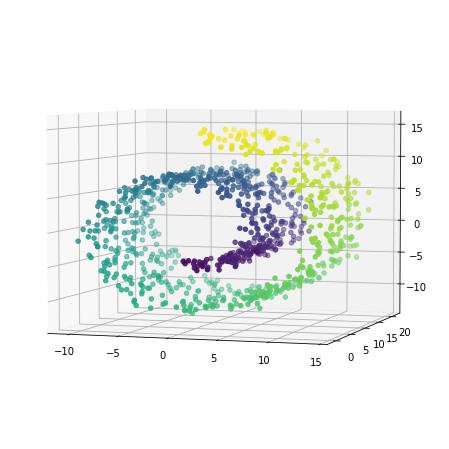

In [7]:
X_roll, y_roll = make_swiss_roll(npoints,noise=0.5)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_roll[:,0],X_roll[:,1],X_roll[:,2],c=y_roll)
ax.view_init(4, -72)

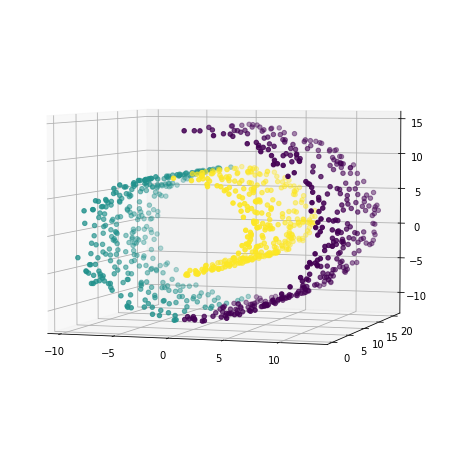

In [8]:
def swill_roll_discret(npoints,noise=.05):
    X_roll, y_roll = make_swiss_roll(npoints,noise=noise)

    y_roll2 = y_roll
    y_roll2 = np.where(y_roll > 11,0,y_roll2)
    y_roll2 = np.where(y_roll < 8,2,y_roll2)
    y_roll2 = np.where(y_roll == y_roll2,1,y_roll2)
    return X_roll,y_roll2

X_roll, y_roll = swill_roll_discret(npoints)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_roll[:,0],X_roll[:,1],X_roll[:,2],c=y_roll)
ax.view_init(4, -72)

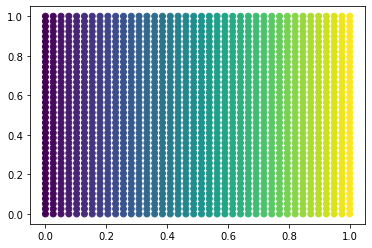

In [9]:
def grid_datasets():
    X_grid = np.array([[x,y] for x in np.linspace(0,1,40) for y in np.linspace(0,1,40)]).reshape(40*40,2)
    return X_grid,X_grid[:,0]

X,y = grid_datasets()
plt.scatter(X[:,0],X[:,1],c=y)

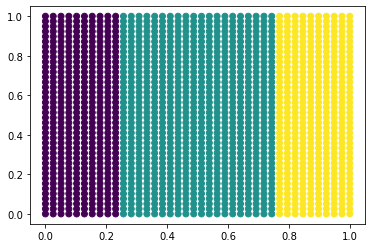

In [10]:
def grid_datasets_sep():
    X_grid = np.array([[x,y] for x in np.linspace(0,1,40) for y in np.linspace(0,1,40)]).reshape(40*40,2)

    y_grid = X_grid[:,0]
    y_grid = np.where(y_grid<= 0.25,0,y_grid)
    y_grid = np.where(y_grid>= 0.75,2,y_grid)
    y_grid = np.where(np.logical_and(y_grid > 0.25,y_grid < 0.75),1,y_grid)
    return X_grid,y_grid

X,y = grid_datasets_sep()
plt.scatter(X[:,0],X[:,1],c=y)

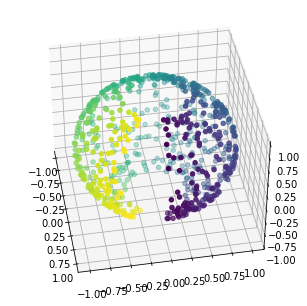

In [12]:
def grid_sphere(n_samples):
    random_state = check_random_state(0)
    p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
    t = random_state.rand(n_samples) * np.pi

    # Sever the poles from the sphere.
    indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
    colors = p[indices]
    x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
        np.sin(t[indices]) * np.sin(p[indices]), \
        np.cos(t[indices])
    return np.array([x, y, z]).T,p[indices]


X,y = grid_sphere(npoints)
fig = plt.figure(figsize=(30, 16))

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.view_init(40, -10)

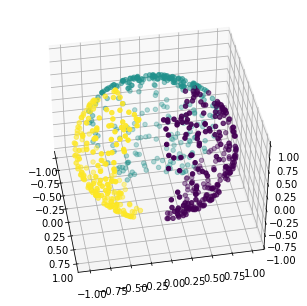

In [13]:
def grid_sphere_discret(n_samples):
    random_state = check_random_state(0)
    p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
    t = random_state.rand(n_samples) * np.pi

    # Sever the poles from the sphere.
    indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
    colors = p[indices]
    x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
        np.sin(t[indices]) * np.sin(p[indices]), \
        np.cos(t[indices])

    y_grid = p[indices]
    y_grid = np.where(y_grid<= 2,0,y_grid)
    y_grid = np.where(y_grid>= 4,2,y_grid)
    y_grid = np.where(np.logical_and(y_grid > 2,y_grid < 4),1,y_grid)
    return np.array([x, y, z]).T,y_grid

X,y = grid_sphere_discret(npoints)
fig = plt.figure(figsize=(30, 16))

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.view_init(40, -10)

In [32]:
gen_datasets = {
    "cercle":make_circles(npoints,noise=.05,factor=.2),
    "moon":make_moons(npoints,noise=0.05),
    "curve":make_s_curve(npoints,noise=.05),
    "curve discret":s_curve_datasets(npoints,noise=.05),
    "swiss roll":make_swiss_roll(npoints,noise=.05),
    "swiss roll discret":swill_roll_discret(npoints),
    "grid":grid_datasets(),
    "grid discret":grid_datasets_sep(),
    "sphere":grid_sphere(npoints),
    "sphere discret":grid_sphere_discret(npoints)
}

## Real

In [23]:
# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X,y,digits, out_file, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    return plt

def plot_digits(nb_class):
    digits = load_digits(n_class=nb_class)
    X = digits.data
    y = digits.target
    n_samples, n_features = X.shape
    std = 0.2
    newU =np.vstack((y//2 , y%2)).T
    arr = newU + std * np.random.randn(newU.shape[0],newU.shape[1])
    plt = plot_embedding(arr,y,digits,"Affichage fictif en cluster des données")

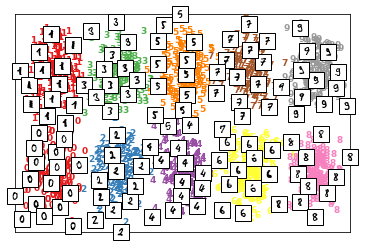

In [24]:
plot_digits(10)

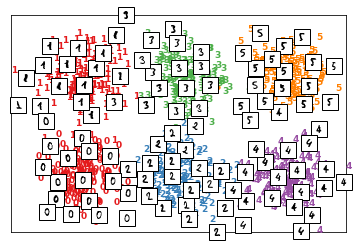

In [25]:
plot_digits(6)

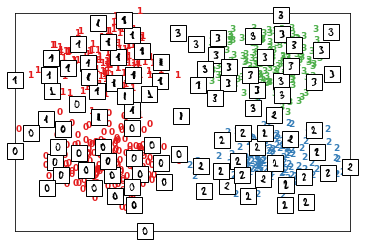

In [26]:
plot_digits(4)

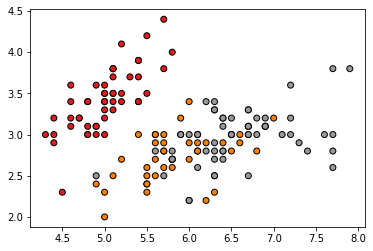

In [31]:
X,y = load_iris(return_X_y=True)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

In [33]:
real_datasets = {
    "digits_all":load_digits(n_class=10,return_X_y=True),
    "digits_6":load_digits(n_class=6,return_X_y=True),
    "digits_4":load_digits(n_class=4,return_X_y=True),
    "iris":load_iris(return_X_y=True)
}

# Visualisation des effets des méthodes de réduction de dimensions

## 2 Components Reduction

In [35]:
methods_2 = [
    PCA(n_components=2),
    LinearDiscriminantAnalysis(n_components=2),
    TSNE(n_components=2),
    SpectralEmbedding(n_components=2),
    SpectralEmbedding(affinity='rbf',n_components=2) # always last one !!
]

def process2(datasets, methods, output_name):
    figsize = figsize = (40, 32)
    rows = len(datasets)
    cols = len(methods)
    axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)

    exec_time = {}
    
    for index_rows,dataset in enumerate(datasets):
        X,y = datasets[dataset]
        exec_time[dataset] = {}

        for index_cols,method in enumerate(methods):
            try:
                t0 = time()
                X_bis = method.fit_transform(X,y)
                t1 = time()
                if index_cols == len(methods)-1:
                    exec_time[dataset]['SpectralEmbedding_rbf'] = t1 - t0
                else:
                    exec_time[dataset][method.__class__.__name__] = t1 - t0

                axs[index_rows,index_cols].scatter(X_bis[:,0],X_bis[:,1],c=y,label="(%.2g sec)" % (t1 - t0))
                axs[index_rows,index_cols].legend()
            except Exception as e:
                print("error: ", method.__class__.__name__)
                pass
        
    for ax, col in zip(axs[0], methods):
        ax.set_title(col.__class__.__name__)

    for ax, row in zip(axs[:,0], datasets):
        ax.set_ylabel(row, rotation=0, size='large')

    #plt.savefig(output_name)
    
    return exec_time

error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis


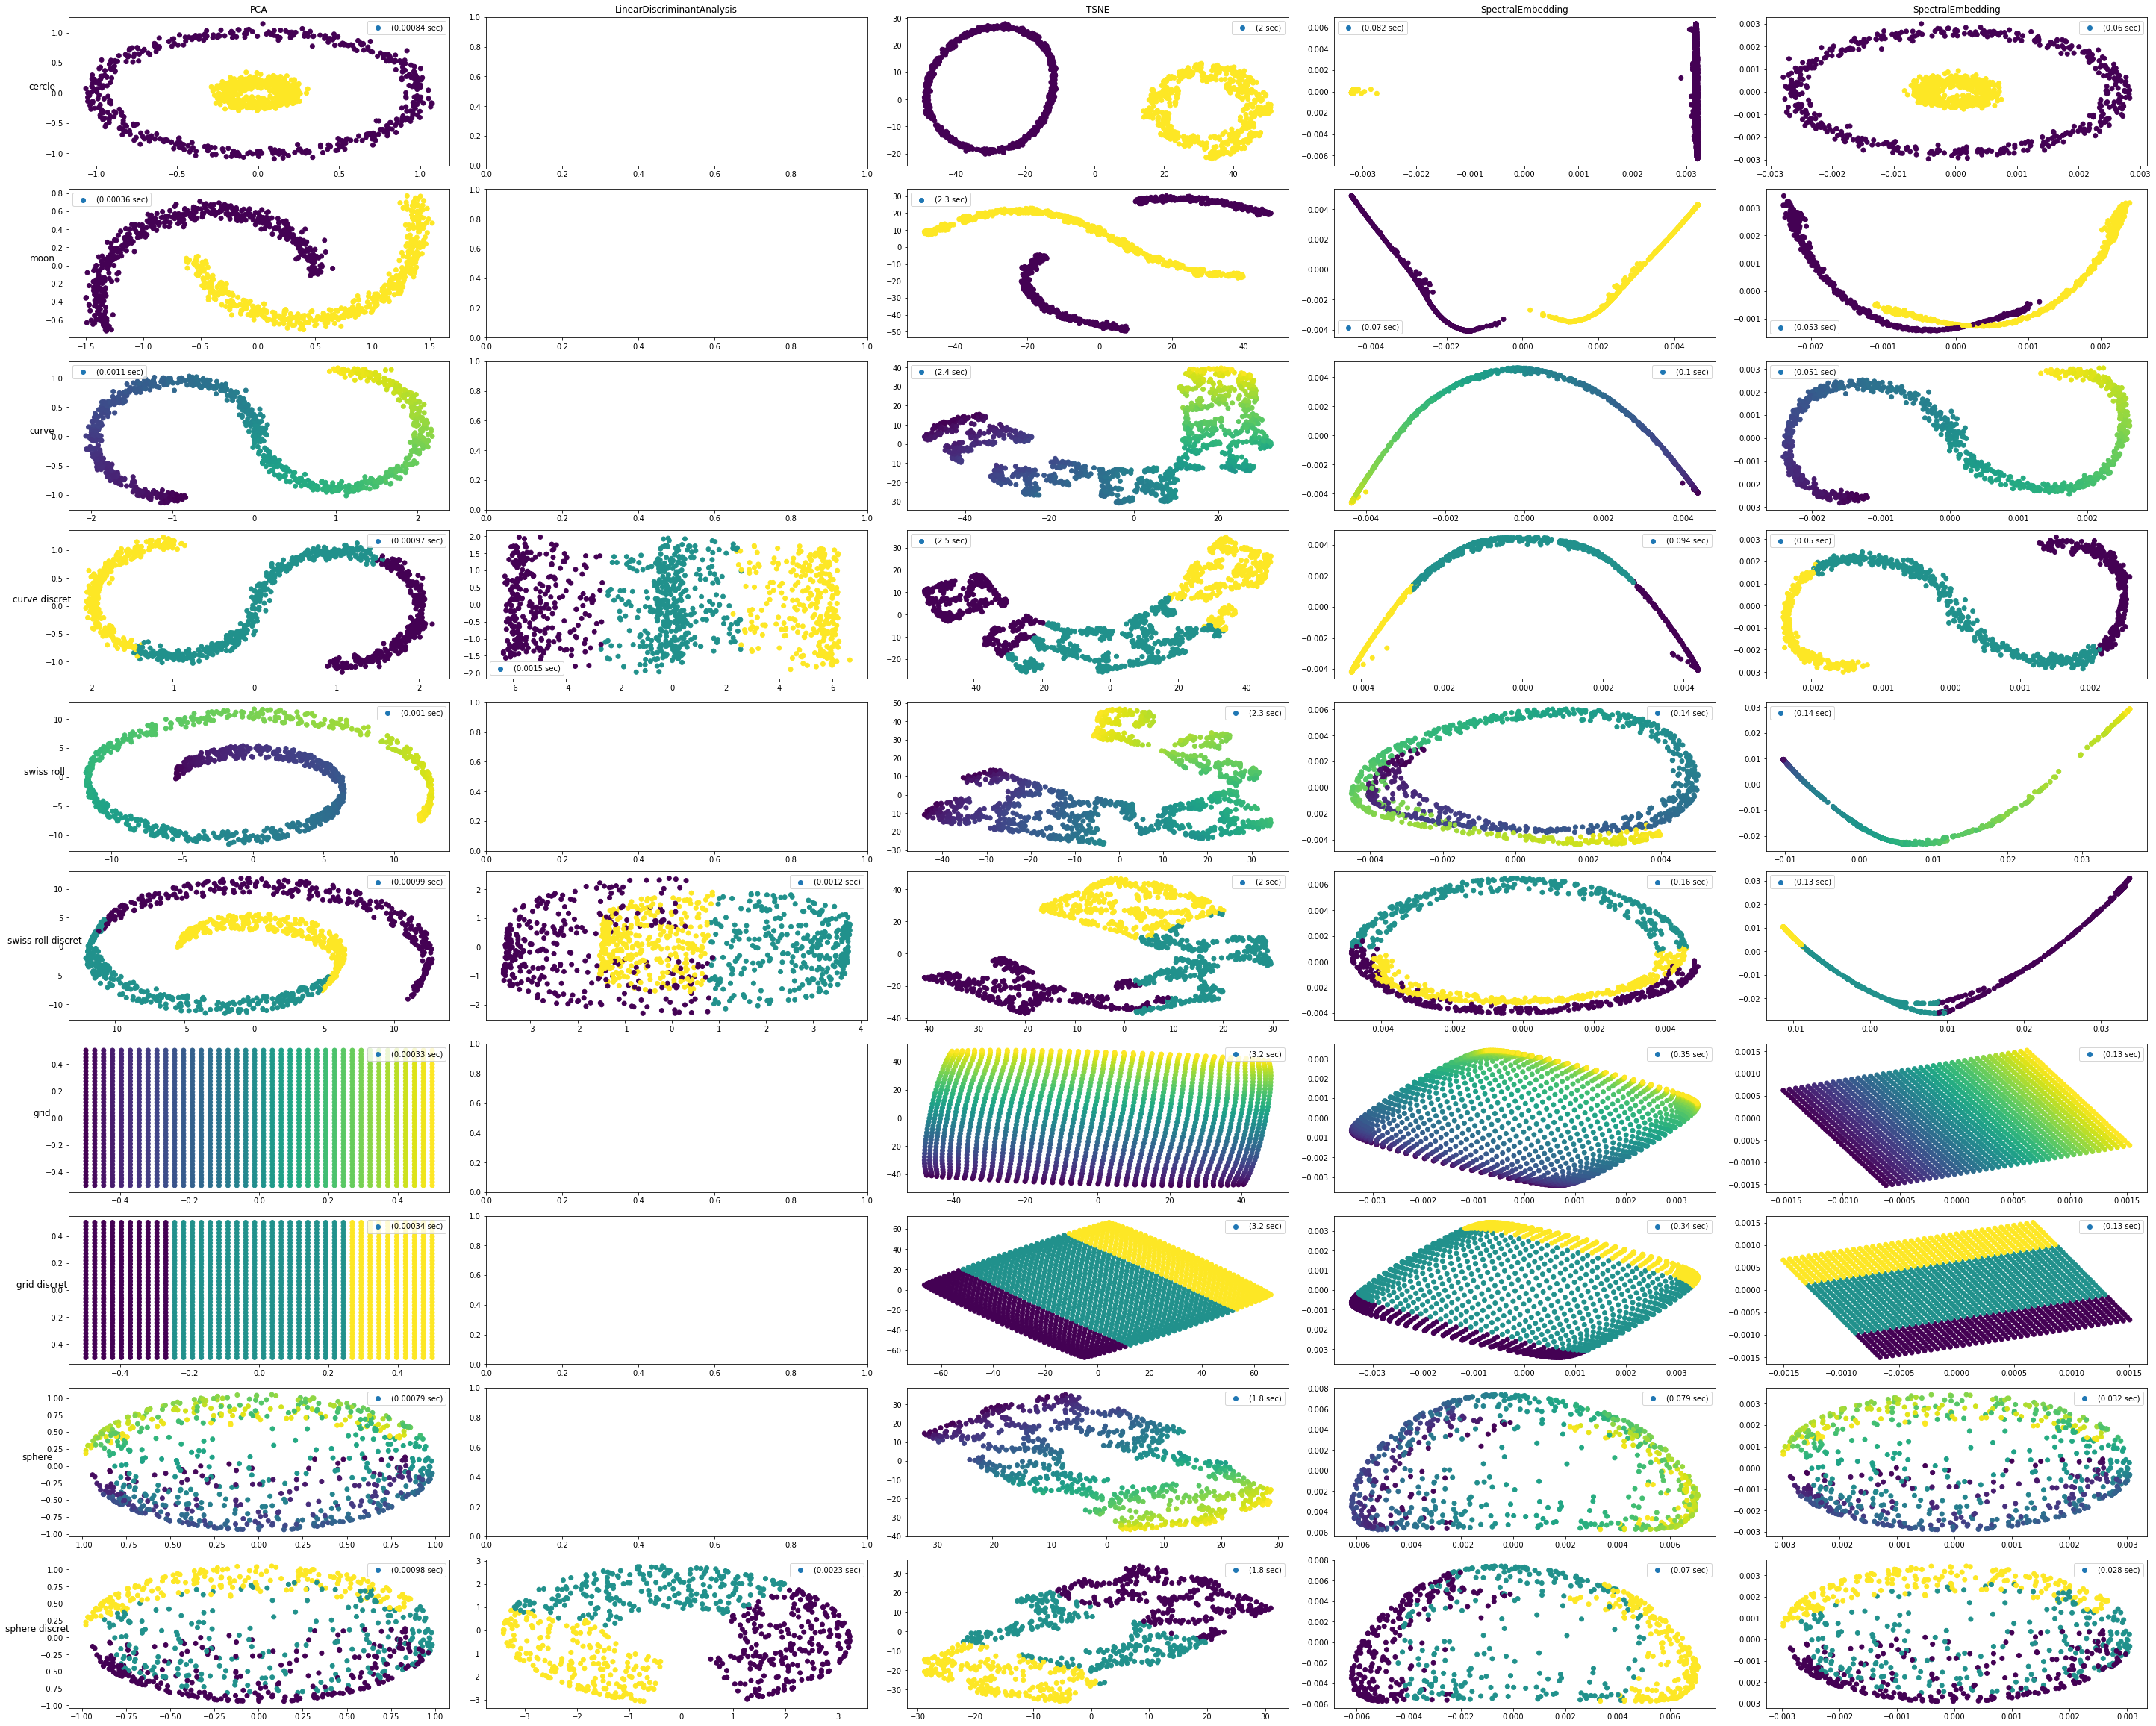

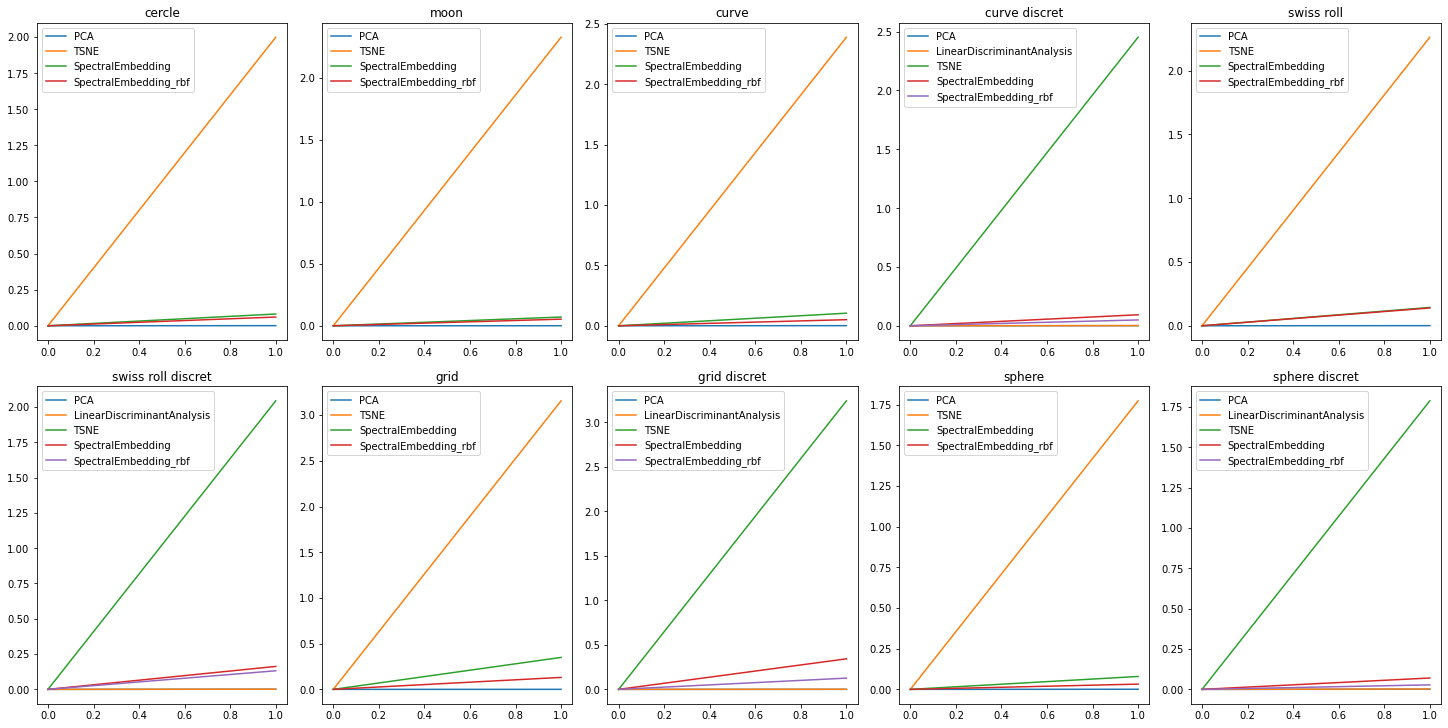

In [36]:
output_name = "gen_datasets_2"
exec_time = process2(gen_datasets, methods_2, output_name)

# Times
figsize = (20, 10)
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(2, 5)

i, j = 0, 0
for _,d in enumerate(exec_time):
    for _,m in enumerate(exec_time[d]):
        axs[i,j].plot([0, exec_time[d][m]], label=m)
        axs[i,j].legend()
        axs[i,j].set_title(d)
        
    j += 1
    if j == 5:
        j = 0
        i = 1

#plt.savefig(output_name+"_times")

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


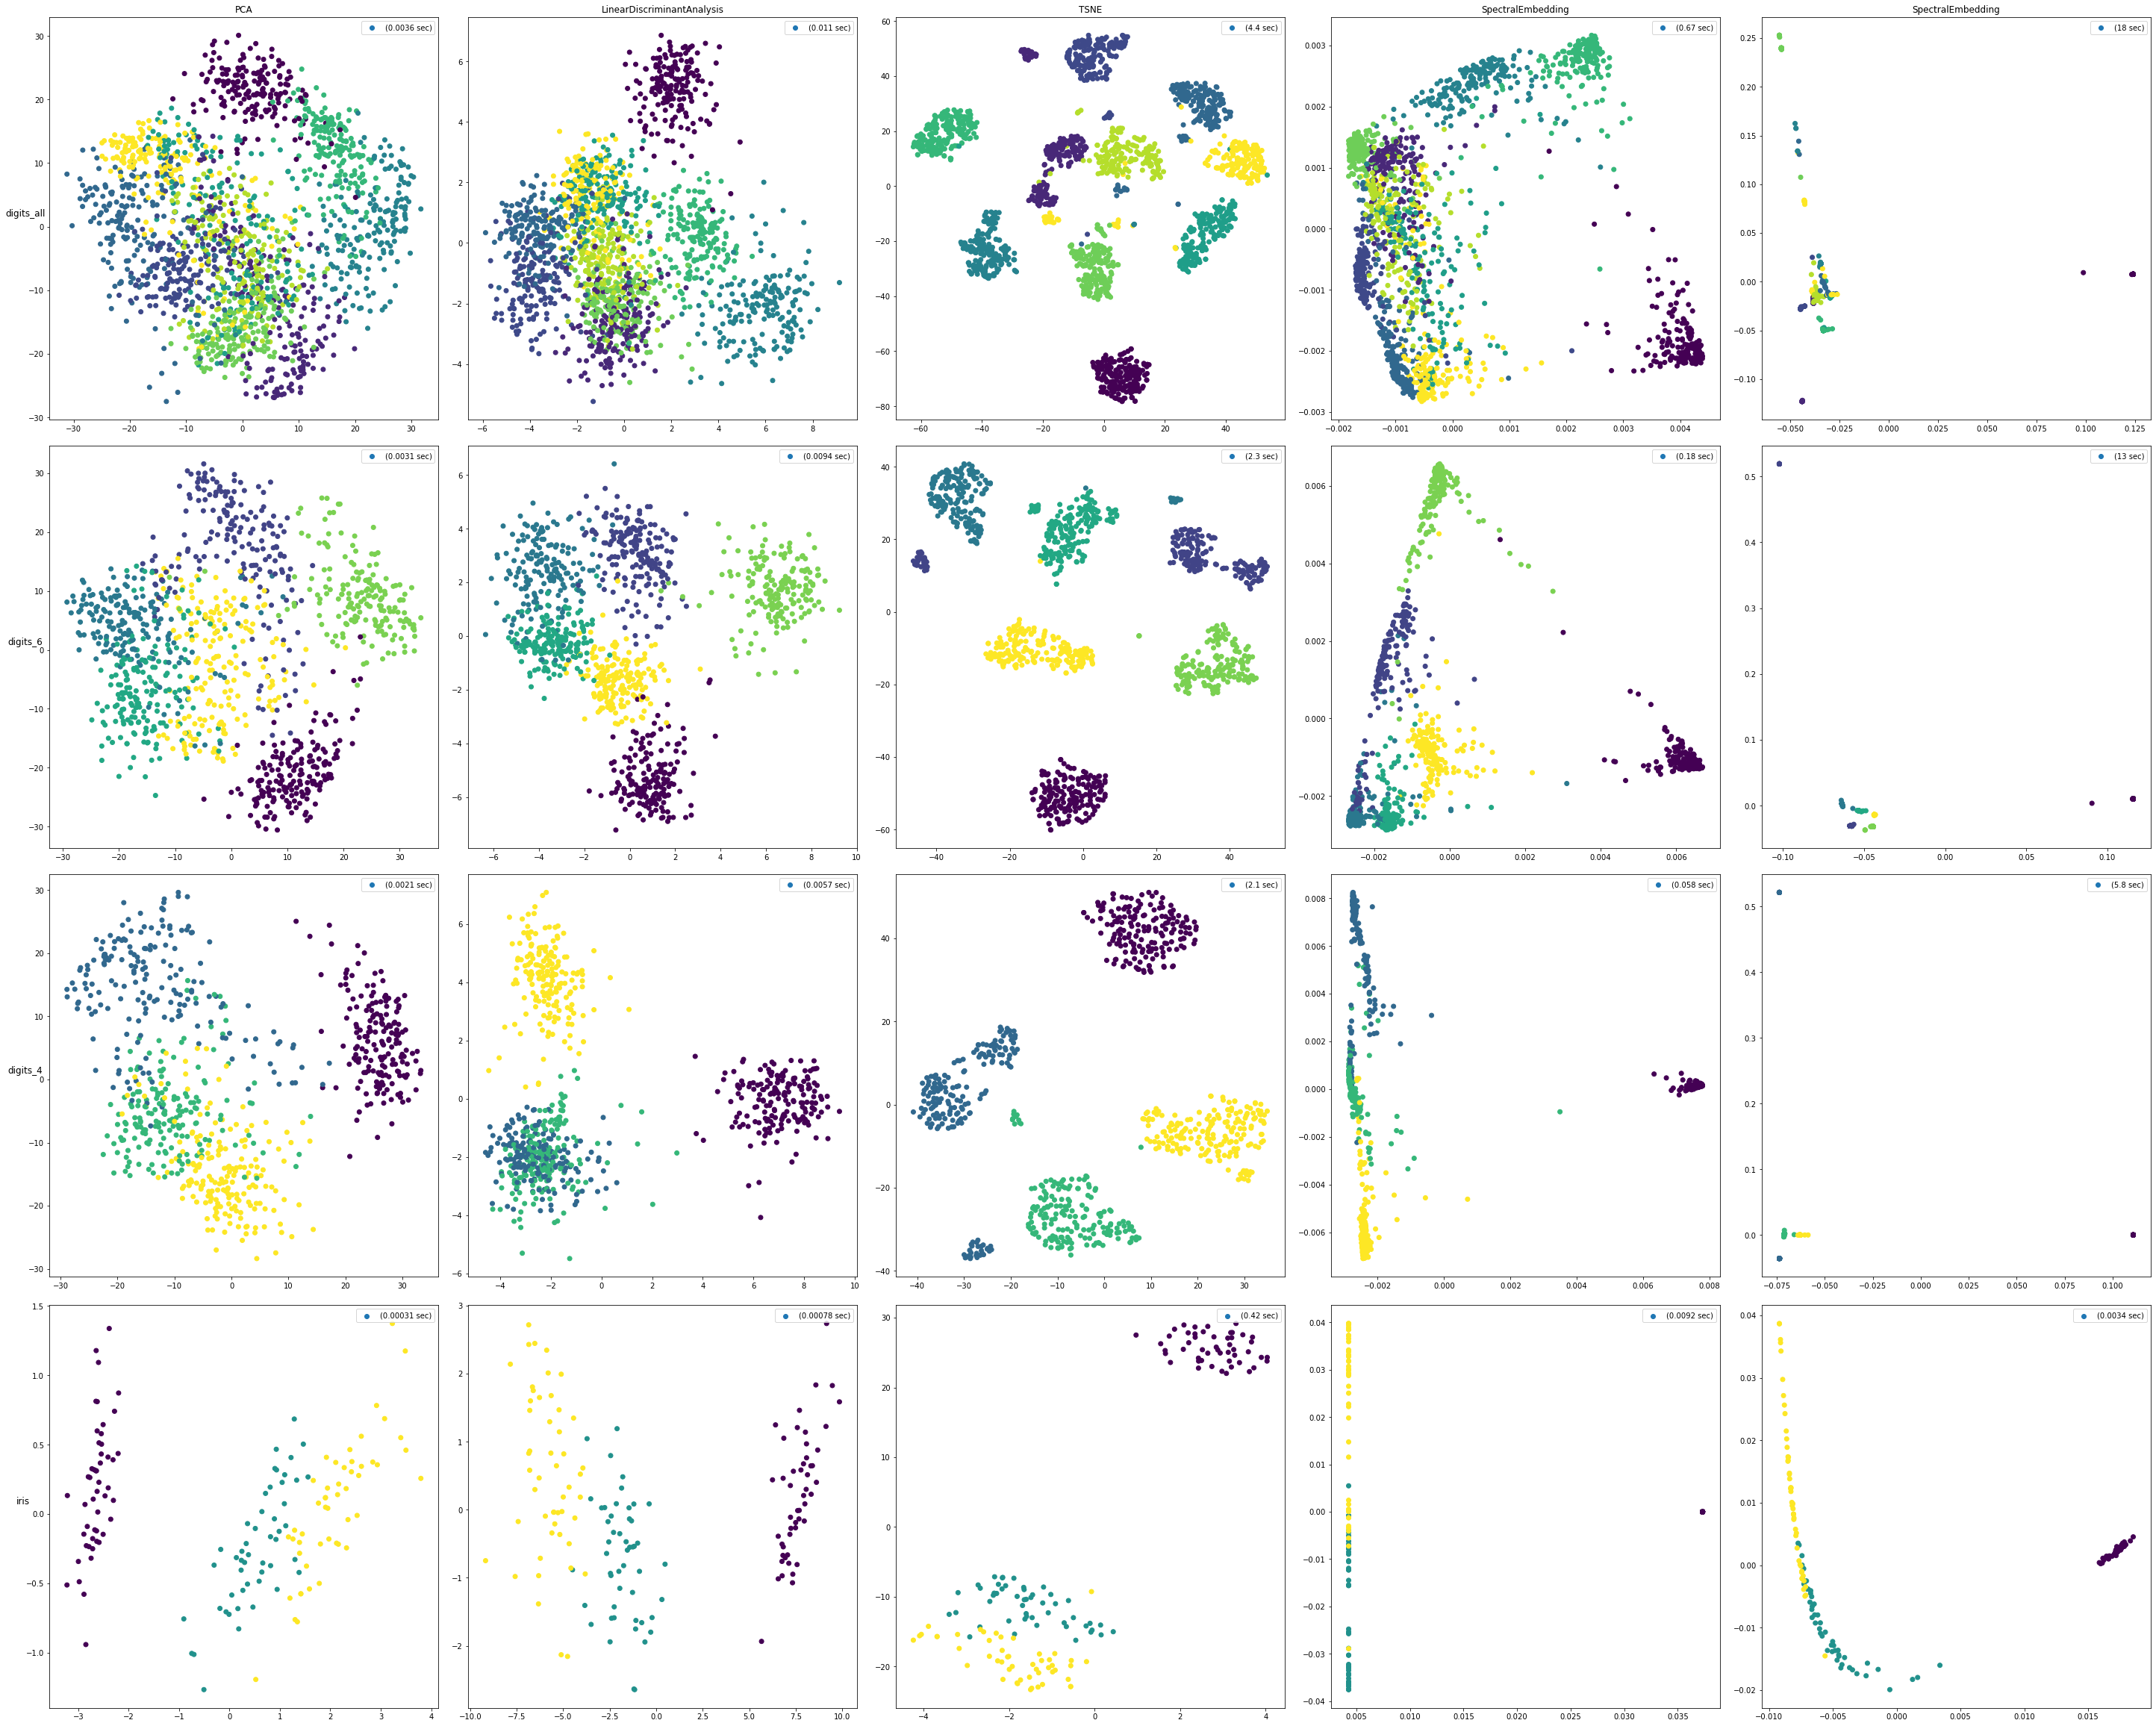

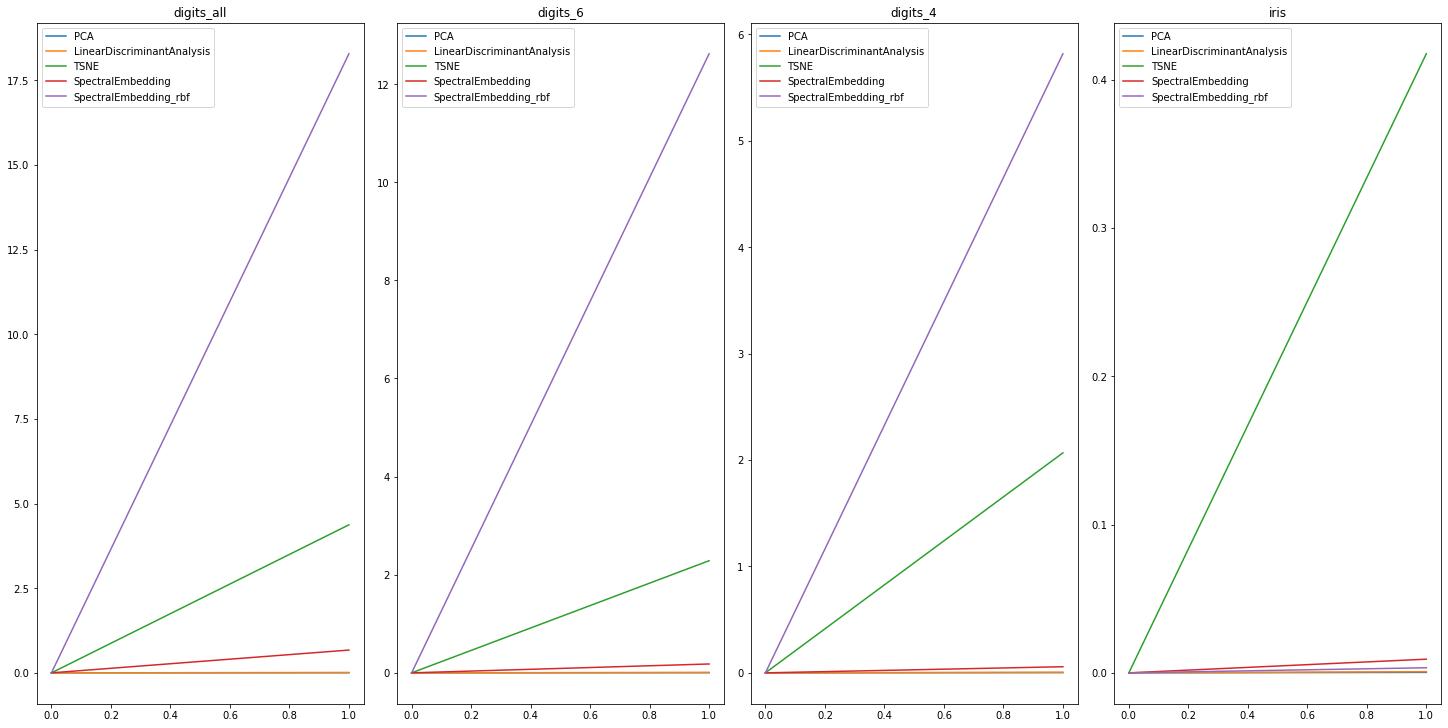

In [37]:
output_name = "real_datasets_2"
exec_time = process2(real_datasets, methods_2, output_name)

# Times
figsize = (20, 10)
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(1, len(real_datasets))

i = 0
for _,d in enumerate(exec_time):
    for _,m in enumerate(exec_time[d]):
        axs[i].plot([0, exec_time[d][m]], label=m)
        axs[i].legend()
        axs[i].set_title(d)
        
    i += 1

#plt.savefig(output_name+"_times")

## 1 Component

In [38]:
methods_1 = [
    PCA(n_components=1),
    LinearDiscriminantAnalysis(n_components=1),
    TSNE(n_components=1),
    SpectralEmbedding(n_components=1),
    SpectralEmbedding(affinity="rbf",n_components=1) # always last one !!
]

def process1(datasets, methods, output_name):
    figsize = figsize = (40, 32)
    rows = len(datasets)
    cols = len(methods)
    axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)

    exec_time = {}
    
    for index_rows,dataset in enumerate(datasets):
        X,y = datasets[dataset]
        exec_time[dataset] = {}

        for index_cols,method in enumerate(methods):
            try:
                t0 = time()
                X_bis = method.fit_transform(X,y)
                t1 = time()
                if index_cols == len(methods)-1:
                    exec_time[dataset]['SpectralEmbedding_rbf'] = t1 - t0
                else:
                    exec_time[dataset][method.__class__.__name__] = t1 - t0
                    
                axs[index_rows,index_cols].scatter(X_bis, y, c=y, label="(%.2g sec)" % (t1 - t0))
                axs[index_rows,index_cols].legend()
            except Exception as e:
                print("error: ", method.__class__.__name__)
                pass
        
    for ax, col in zip(axs[0], methods):
        ax.set_title(col.__class__.__name__)

    for ax, row in zip(axs[:,0], datasets):
        ax.set_ylabel(row, rotation=0, size='large')

    #plt.savefig(output_name)
    
    return exec_time

error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis
error:  LinearDiscriminantAnalysis


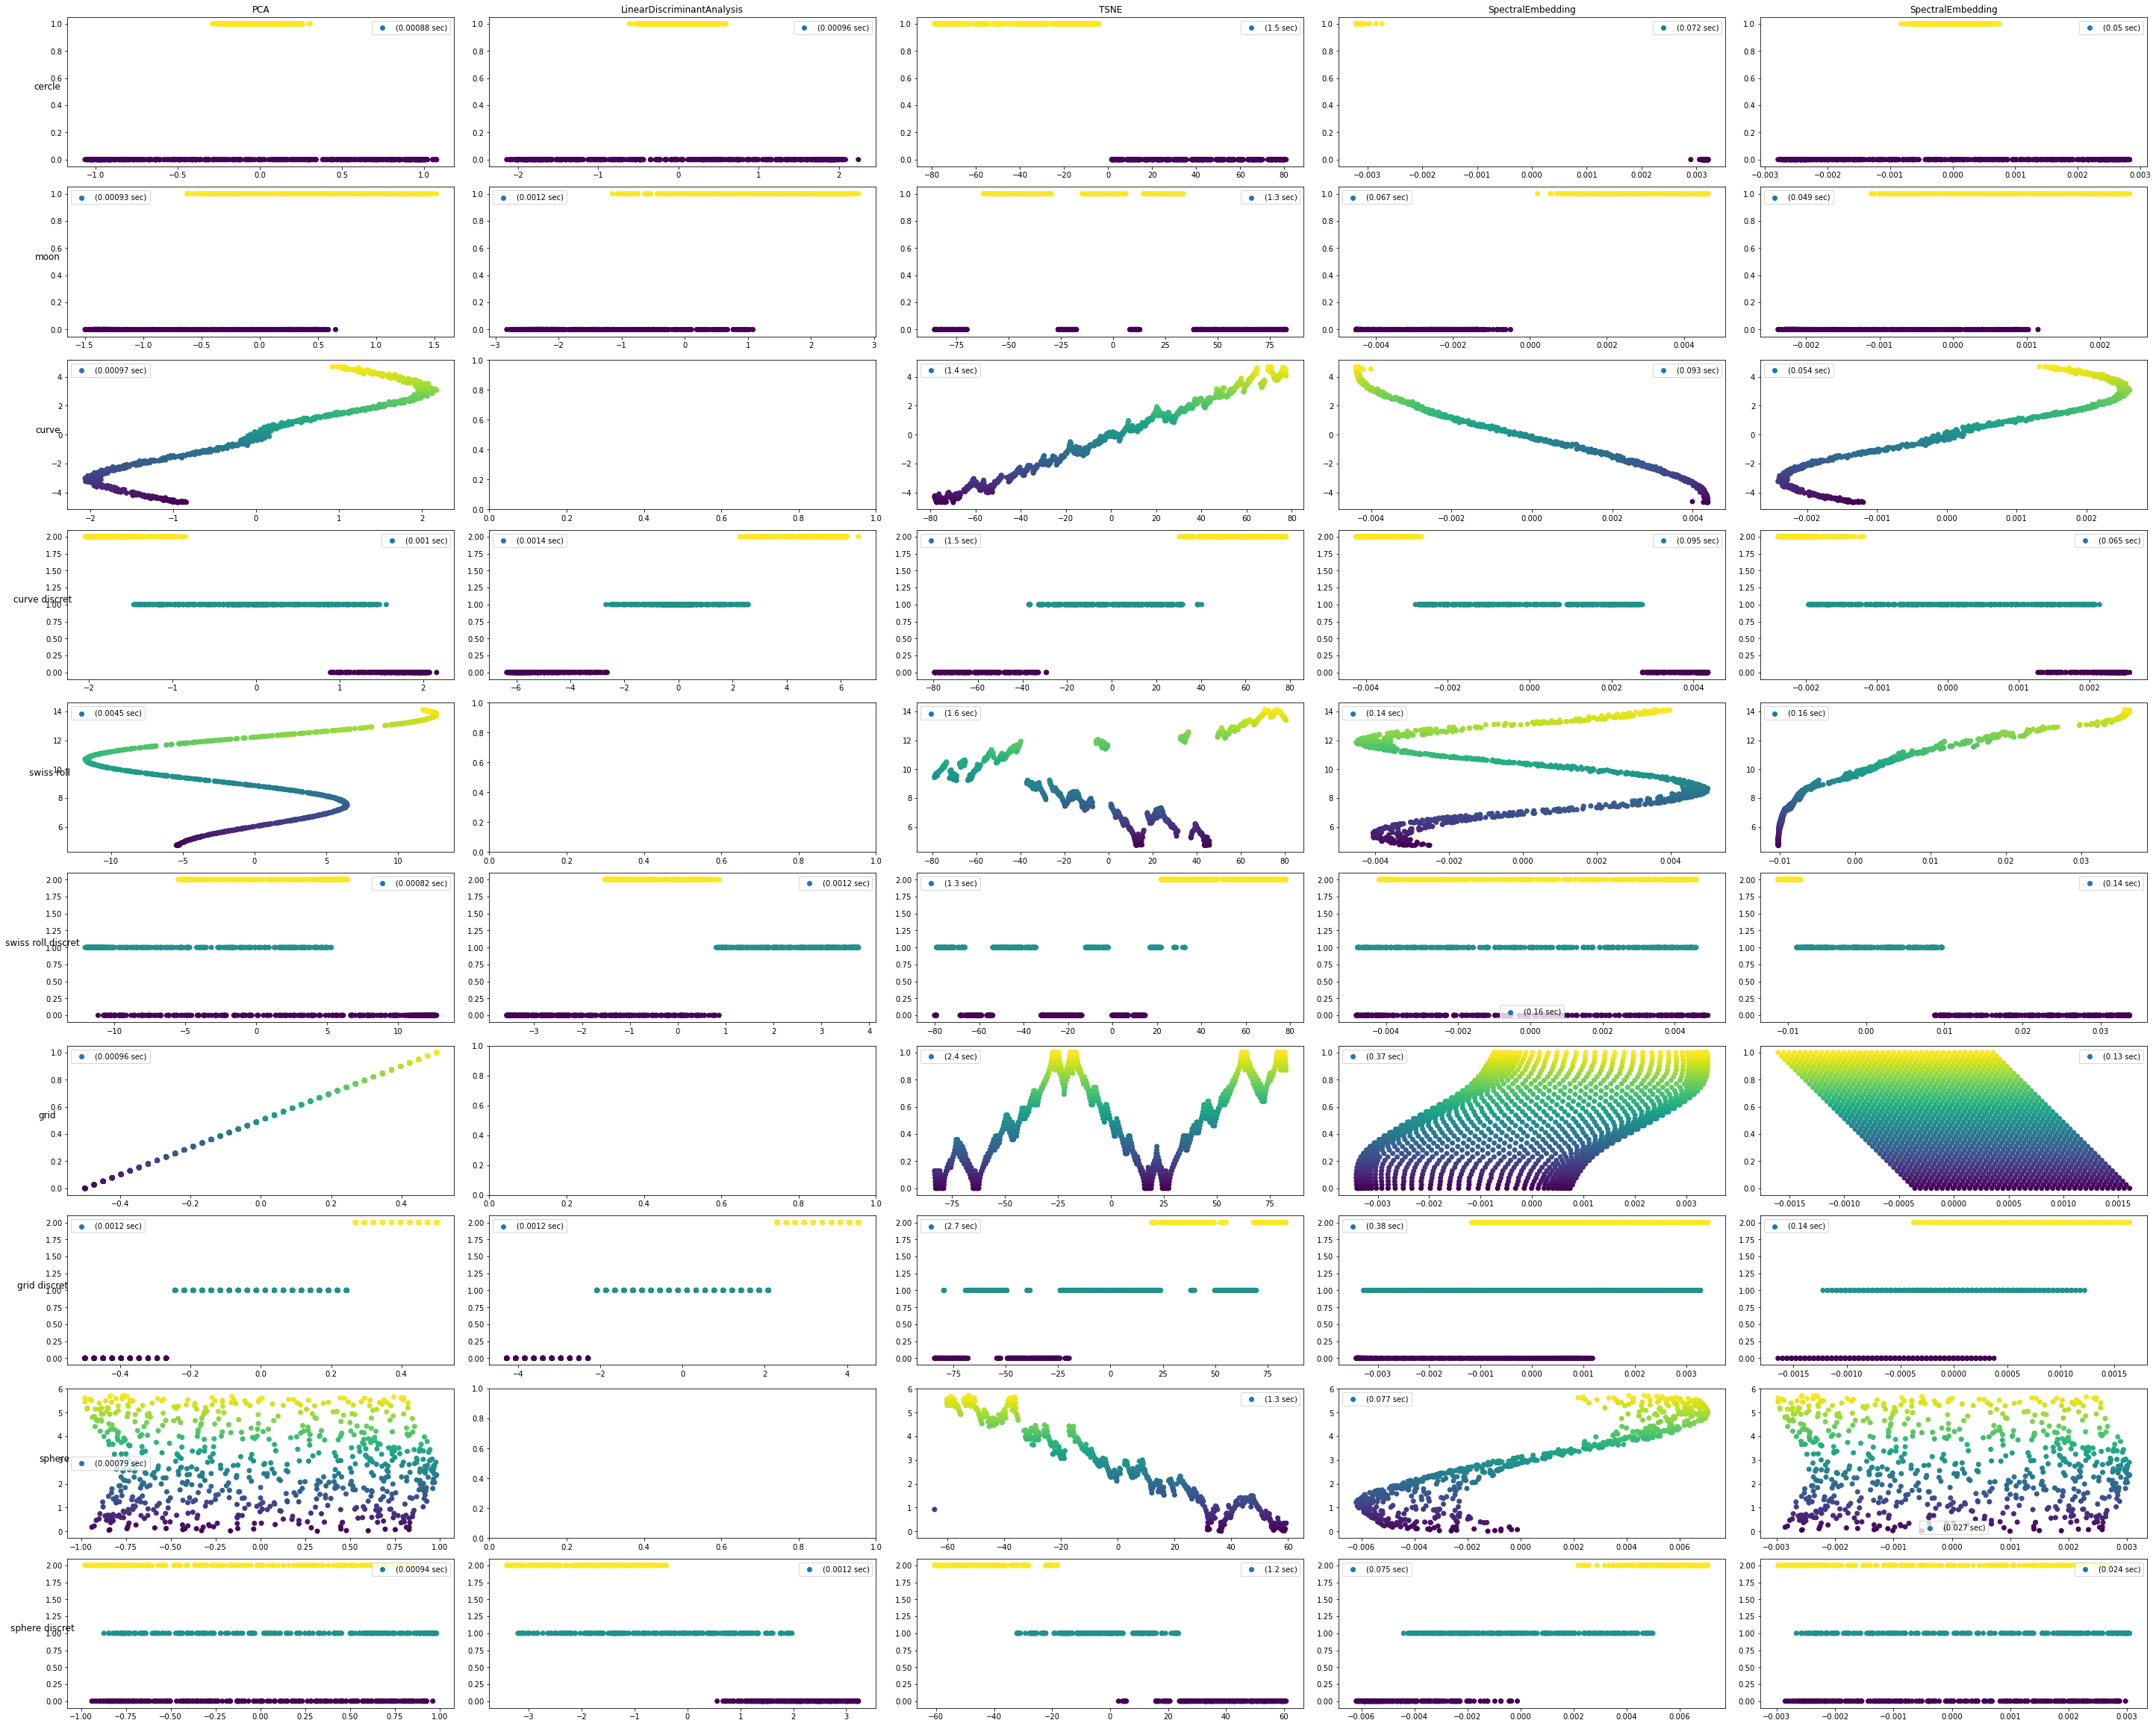

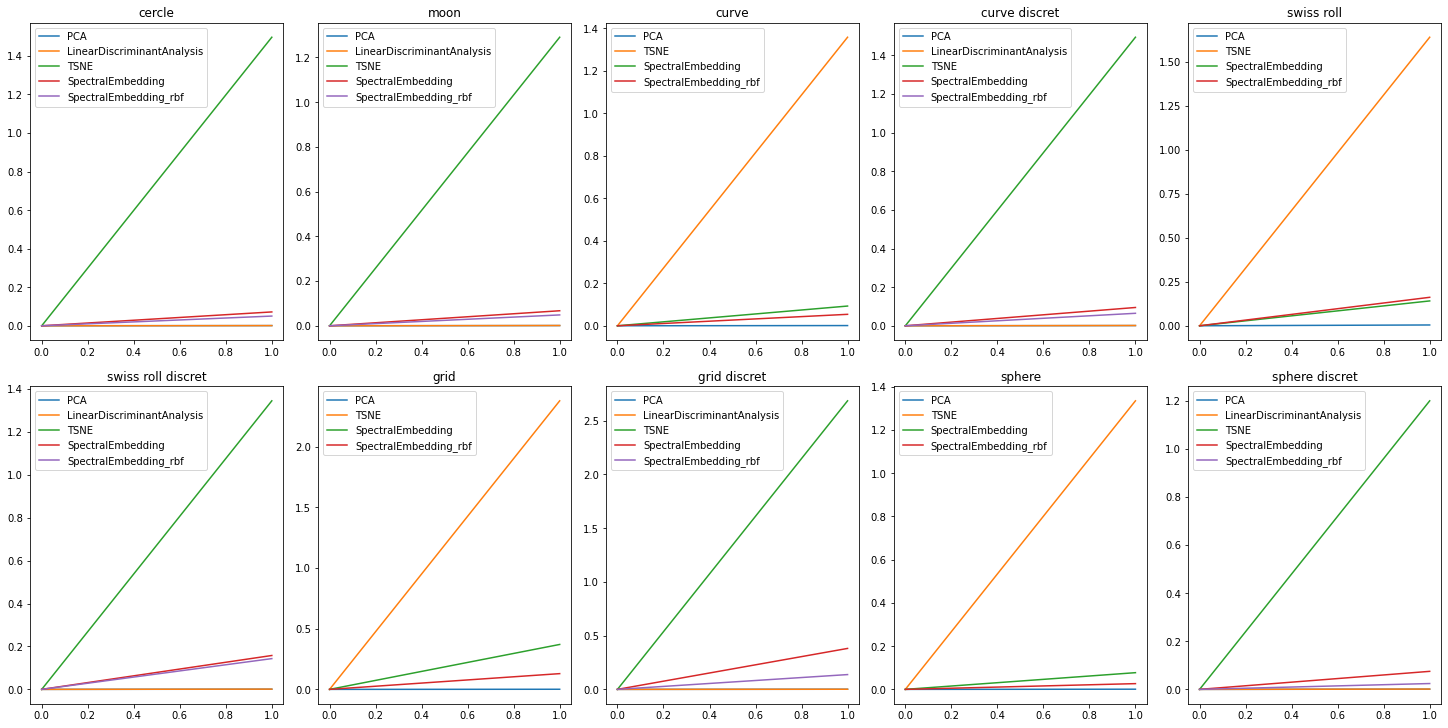

In [39]:
output_name = "gen_datasets_1"
exec_time = process1(gen_datasets, methods_1, output_name)

# Times
figsize = (20, 10)
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(2, 5)

i, j = 0, 0
for _,d in enumerate(exec_time):
    for _,m in enumerate(exec_time[d]):
        axs[i,j].plot([0, exec_time[d][m]], label=m)
        axs[i,j].legend()
        axs[i,j].set_title(d)
        
    j += 1
    if j == 5:
        j = 0
        i += 1

#plt.savefig(output_name+"_times")

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


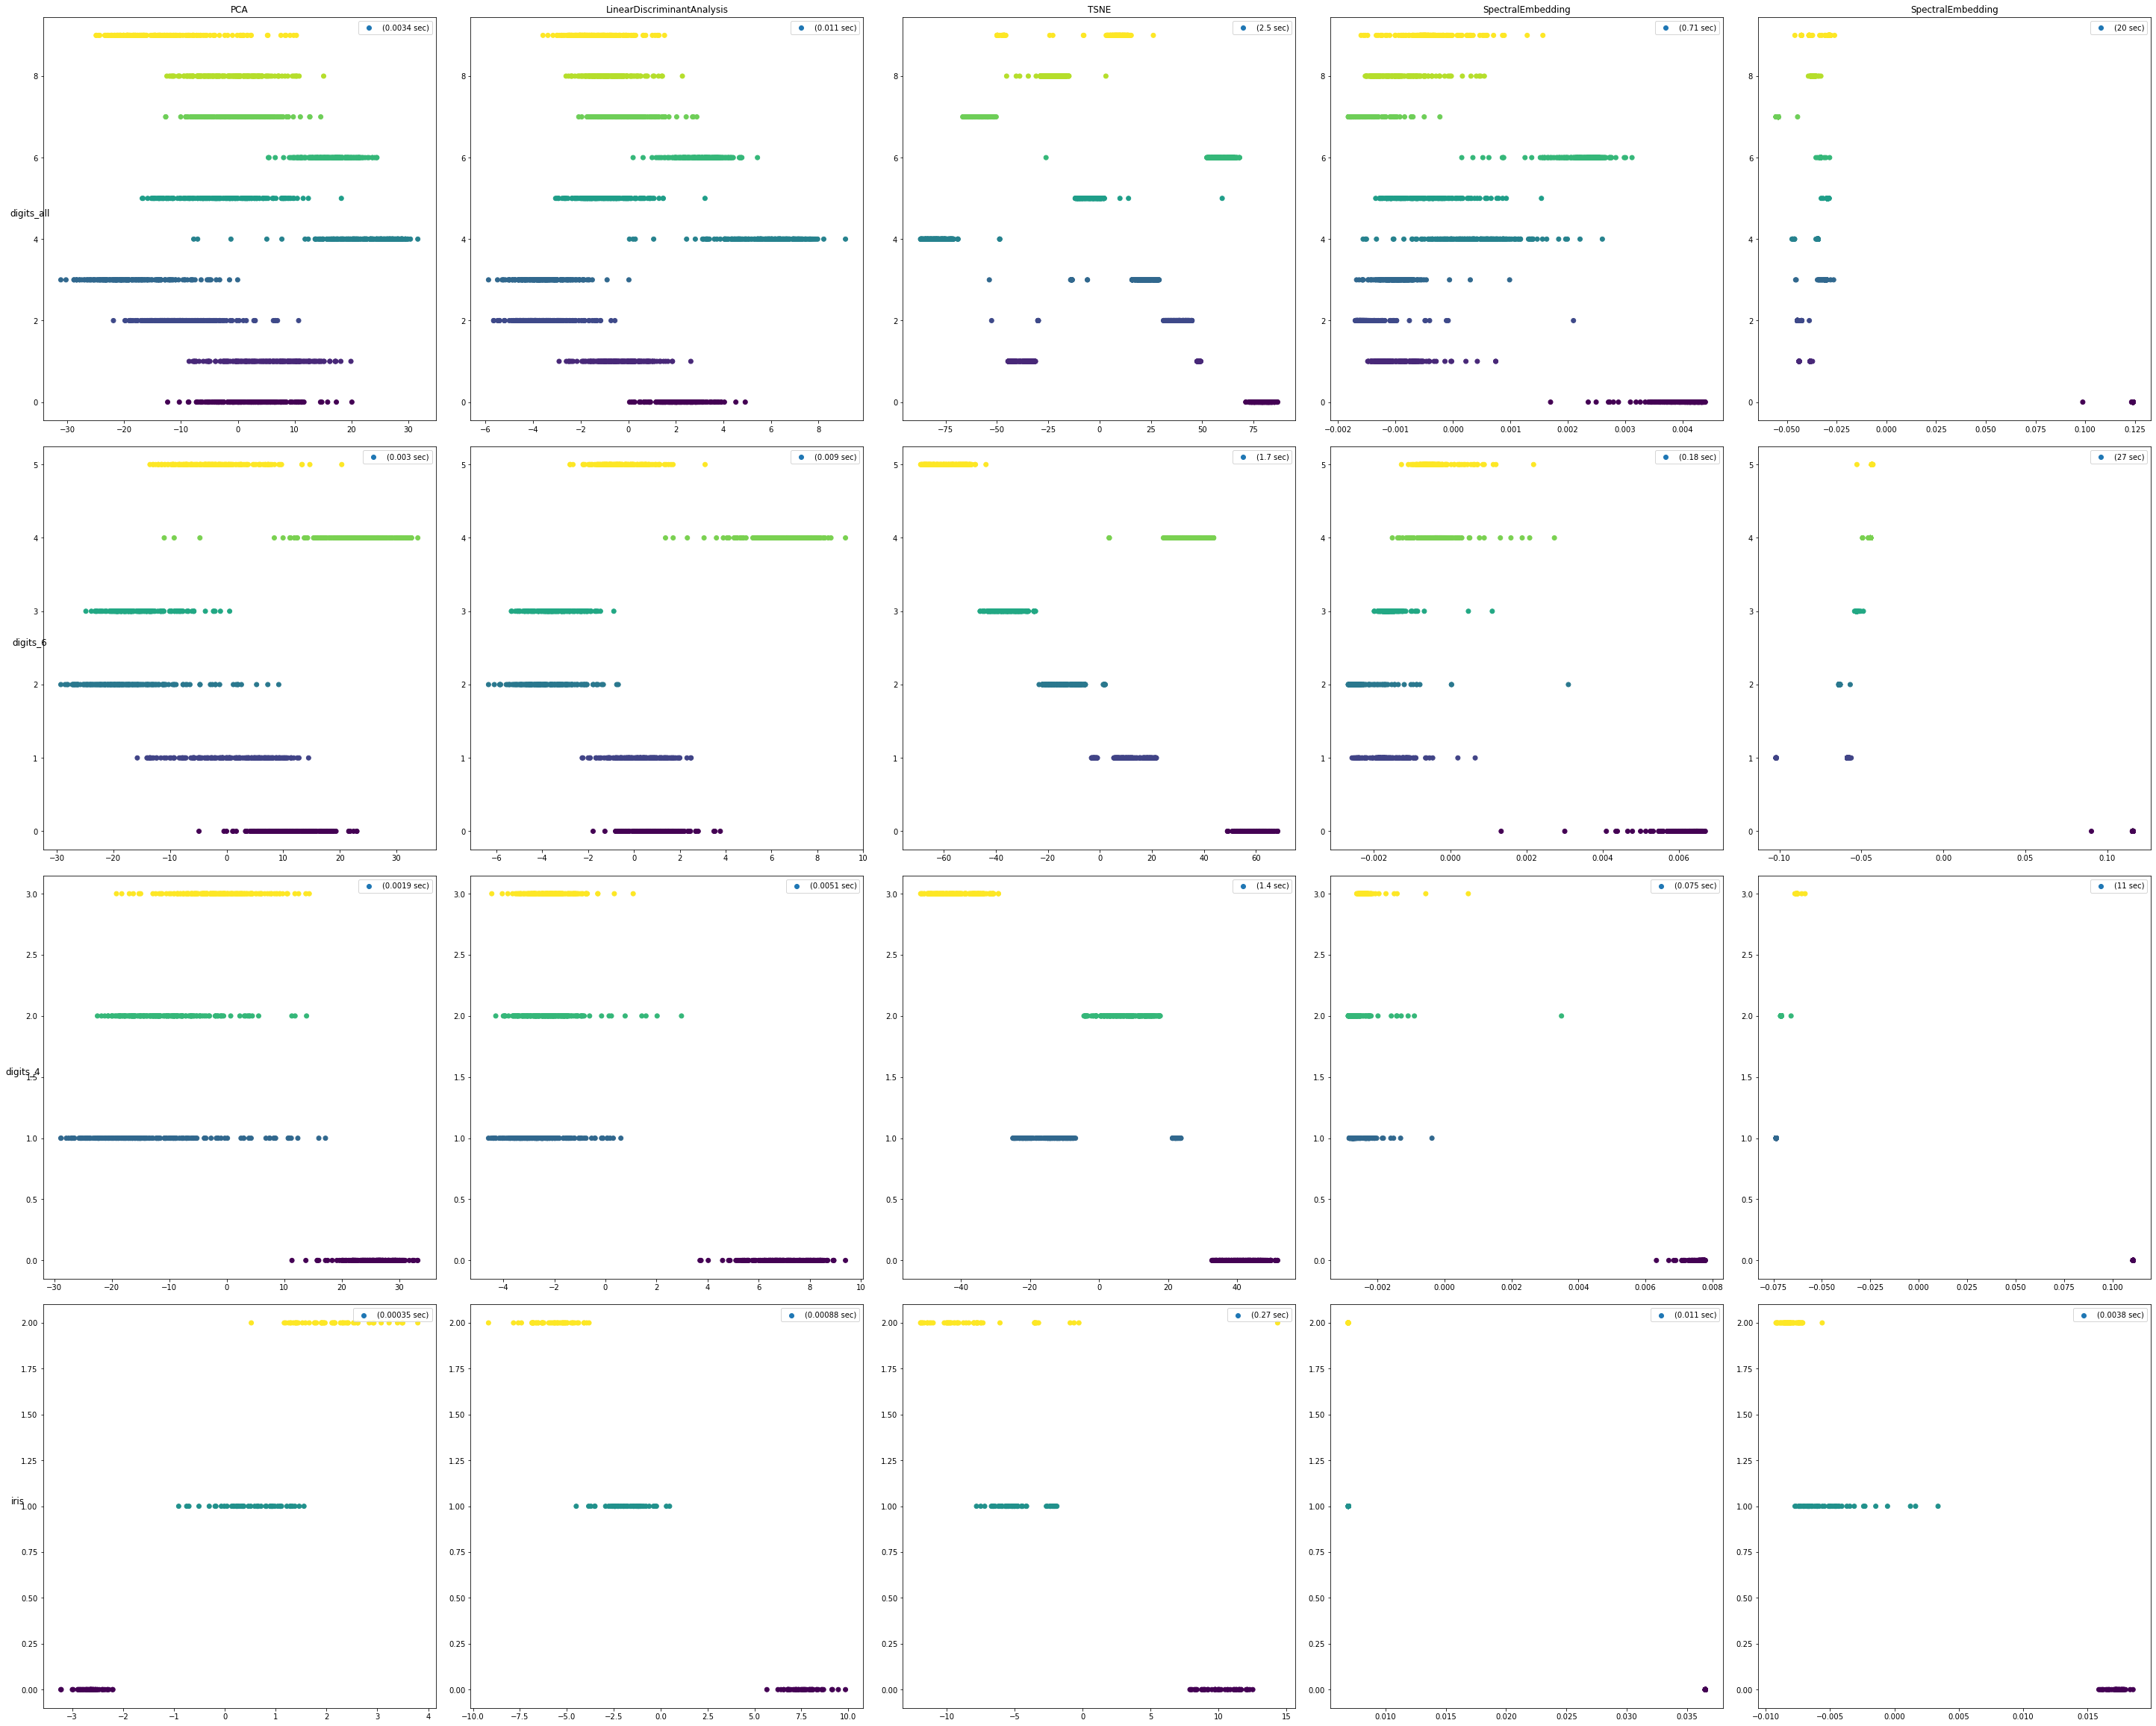

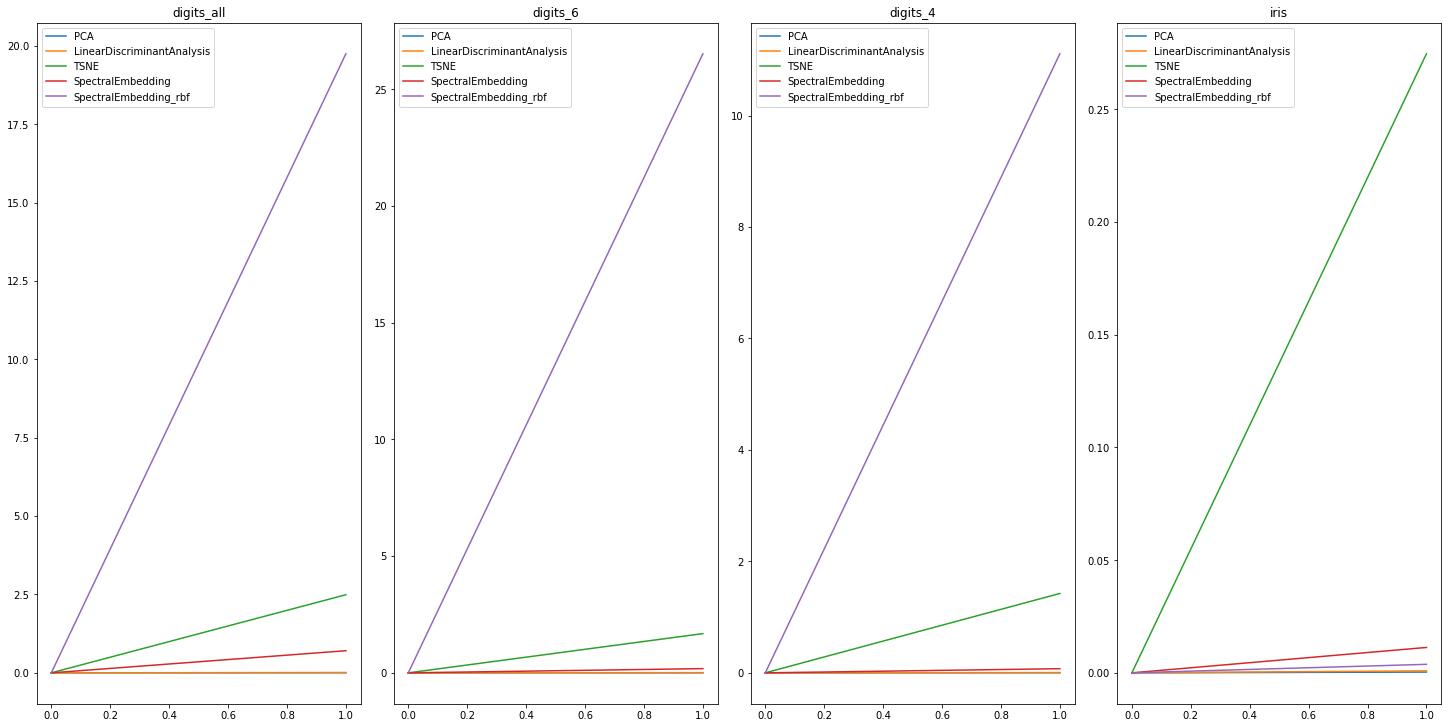

In [40]:
output_name = "real_datasets_1"
exec_time = process1(real_datasets, methods_1, output_name)

# Times
figsize = (20, 10)
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(1, len(real_datasets))

i = 0
for _,d in enumerate(exec_time):
    for _,m in enumerate(exec_time[d]):
        axs[i].plot([0, exec_time[d][m]], label=m)
        axs[i].legend()
        axs[i].set_title(d)
        
    i += 1

#plt.savefig(output_name+"_times")

# Evaluation

In [113]:
def evaluate(datasets, clfs):
    scores = {}
    
    for dataset in datasets:
        scores[dataset] = {}
                
        X,y = datasets[dataset]
        
        X = StandardScaler().fit_transform(X)
        
        print("dataset: ", dataset)

        for _,clf in enumerate(clfs):
            try:  
                scores[dataset][clf] = cross_val_score(clfs[clf], X, y, cv=3).mean()
                print("  clf: ", clf, ", score: ", scores[dataset][clf])
                
            except Exception as e:
                print("error: ", clf, e)
                pass
    
    return scores

def red_evaluate(datasets, clfs, methods):
    scores = {}
    
    for method in methods:
        print(" method: ", method)
        scores[method] = {}
    
        for dataset in datasets:
            X,y = datasets[dataset]
            scores[method][dataset] = {}
        
            print("dataset: ", dataset)
            try:
                X_bis = method.fit_transform(X,y)
            except Exception as e:
                print("  reduction error: ", method, e)
                pass
            
            for clf in clfs:
                try:
                    scores[method][dataset][clf] = cross_val_score(clfs[clf], X_bis, y, cv=3).mean()
                    print("   clf: ", clf, ", score: ", scores[method][dataset][clf])       

                except Exception as e:
                    print("  clf error: ", clf, e)
                    pass    
    return scores

classifiers = {
    'KNN': KNeighborsClassifier(3),
    'SVC_lin': SVC(kernel="linear", C=0.025),
    'SVC': SVC(gamma=2, C=1),
    'DT': DecisionTreeClassifier(max_depth=5),
    'RF': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    'MLP': MLPClassifier(alpha=1, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'GNB': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis()
}

gen_datasets_eval = {
    "cercle":make_circles(npoints,noise=.05,factor=.2),
    "moon":make_moons(npoints,noise=0.05),
    "scurve":s_curve_datasets(npoints,noise=.05),
    "swiss_roll":swill_roll_discret(npoints),
    "grid":grid_datasets_sep(),
    "sphere":grid_sphere_discret(npoints)
}

In [102]:
scores_gen = evaluate(gen_datasets_eval, classifiers)

dataset:  cercle
 method:  PCA(n_components=2)
   clf:  KNN , score:  1.0
   clf:  SVC_lin , score:  0.5538892185598773
   clf:  SVC , score:  1.0
   clf:  DT , score:  0.994994994994995
   clf:  RF , score:  0.9969969969969968
   clf:  MLP , score:  1.0
   clf:  AdaBoost , score:  0.995995995995996
   clf:  GNB , score:  1.0
   clf:  QDA , score:  1.0
 method:  LinearDiscriminantAnalysis(n_components=2)
  reduction error:  LinearDiscriminantAnalysis(n_components=2) n_components cannot be larger than min(n_features, n_classes - 1).
   clf:  KNN , score:  1.0
   clf:  SVC_lin , score:  0.5538892185598773
   clf:  SVC , score:  1.0
   clf:  DT , score:  0.994994994994995
   clf:  RF , score:  0.995995995995996
   clf:  MLP , score:  1.0
   clf:  AdaBoost , score:  0.995995995995996
   clf:  GNB , score:  1.0
   clf:  QDA , score:  1.0
 method:  TSNE()
   clf:  KNN , score:  1.0
   clf:  SVC_lin , score:  1.0
   clf:  SVC , score:  0.9970059880239521
   clf:  DT , score:  1.0
   clf:  RF 

   clf:  SVC_lin , score:  0.666823599955965
   clf:  SVC , score:  0.7463290492887643
   clf:  DT , score:  0.8000623048581393
   clf:  RF , score:  0.8000623048581393
   clf:  MLP , score:  0.7588239840911806
   clf:  AdaBoost , score:  0.8000623048581393
   clf:  GNB , score:  0.8000623048581393
   clf:  QDA , score:  0.7931900321596128
 method:  LinearDiscriminantAnalysis(n_components=2)
   clf:  KNN , score:  0.7500778810726741
   clf:  SVC_lin , score:  0.7500778810726741
   clf:  SVC , score:  0.8000623048581393
   clf:  DT , score:  0.8000623048581393
   clf:  RF , score:  0.8000623048581393
   clf:  MLP , score:  0.7500778810726741
   clf:  AdaBoost , score:  0.8000623048581393
   clf:  GNB , score:  0.8000623048581393
   clf:  QDA , score:  0.8000623048581393
 method:  TSNE()
   clf:  KNN , score:  0.7513274916673107
   clf:  SVC_lin , score:  0.7781947050239731
   clf:  SVC , score:  0.5000011711439499
   clf:  DT , score:  0.7400856808913812
   clf:  RF , score:  0.75321888

   clf:  MLP , score:  0.8629947312582043
   clf:  AdaBoost , score:  0.8719947492402582
   clf:  GNB , score:  0.8669927412442382
   clf:  QDA , score:  0.8669927412442382
 method:  LinearDiscriminantAnalysis(n_components=1)
   clf:  KNN , score:  0.985994977012941
   clf:  SVC_lin , score:  0.9839959720199242
   clf:  SVC , score:  0.9879969790149431
   clf:  DT , score:  0.9829889770009531
   clf:  RF , score:  0.985991980003956
   clf:  MLP , score:  0.9879999760239281
   clf:  AdaBoost , score:  0.9809929690169211
   clf:  GNB , score:  0.988997980015944
   clf:  QDA , score:  0.988997980015944
 method:  TSNE(n_components=1)
   clf:  KNN , score:  0.9719809629989271
   clf:  SVC_lin , score:  0.9669849490208772
   clf:  SVC , score:  0.96998195800591
   clf:  DT , score:  0.9719959480438524
   clf:  RF , score:  0.9749899600199002
   clf:  MLP , score:  0.9559889230547913
   clf:  AdaBoost , score:  0.9629779480078882
   clf:  GNB , score:  0.9669819520118922
   clf:  QDA , score:

   clf:  AdaBoost , score:  0.3111111111111111
   clf:  GNB , score:  0.4069444444444445
   clf:  QDA , score:  0.4069444444444445


In [103]:
df = pd.DataFrame(scores_gen)
df.to_latex('scores_gen.tex', float_format="%.2f")
df = df.style.highlight_max(color='lightgreen', axis=1)
df

In [114]:
scores_gen_red2 = red_evaluate(gen_datasets_eval, classifiers, methods_2)

 method:  PCA(n_components=2)
dataset:  cercle
   clf:  KNN , score:  1.0
   clf:  SVC_lin , score:  0.559877242511973
   clf:  SVC , score:  1.0
   clf:  DT , score:  0.993996991002979
   clf:  RF , score:  0.993996991002979
   clf:  MLP , score:  1.0
   clf:  AdaBoost , score:  0.996001990013966
   clf:  GNB , score:  1.0
   clf:  QDA , score:  1.0
dataset:  moon
   clf:  KNN , score:  1.0
   clf:  SVC_lin , score:  0.8619907332482182
   clf:  SVC , score:  1.0
   clf:  DT , score:  0.991994989000977
   clf:  RF , score:  0.9880059700418982
   clf:  MLP , score:  0.9650009290727853
   clf:  AdaBoost , score:  0.995995995995996
   clf:  GNB , score:  0.8639927352502204
   clf:  QDA , score:  0.8829997662332992
dataset:  scurve
   clf:  KNN , score:  0.9840079600558642
   clf:  SVC_lin , score:  0.9810049570528613
   clf:  SVC , score:  0.9840049630468792
   clf:  DT , score:  0.9650009290727853
   clf:  RF , score:  0.9800039560518602
   clf:  MLP , score:  0.9840049630468792
   clf: 

   clf:  SVC , score:  0.6656656656656658
   clf:  DT , score:  1.0
   clf:  RF , score:  0.998998998998999
   clf:  MLP , score:  0.49899899899899897
   clf:  AdaBoost , score:  1.0
   clf:  GNB , score:  1.0
   clf:  QDA , score:  1.0
dataset:  moon
   clf:  KNN , score:  0.998998998998999
   clf:  SVC_lin , score:  0.6636696576816337
   clf:  SVC , score:  0.6636696576816337
   clf:  DT , score:  0.998998998998999
   clf:  RF , score:  0.9979979979979979
   clf:  MLP , score:  0.5
   clf:  AdaBoost , score:  0.9979979979979979
   clf:  GNB , score:  0.998998998998999
   clf:  QDA , score:  0.996999994005982
dataset:  scurve
   clf:  KNN , score:  0.9809959660259061
   clf:  SVC_lin , score:  0.42900085714456965
   clf:  SVC , score:  0.42900085714456965
   clf:  DT , score:  0.9789999580418742
   clf:  RF , score:  0.9759939580298861
   clf:  MLP , score:  0.42900085714456965
   clf:  AdaBoost , score:  0.9819939700179221
   clf:  GNB , score:  0.9869989750229271
   clf:  QDA , scor

In [128]:
for m in scores_gen_red2:
    print(m)
    out = str(m) + "_red2.tex"
    tmp = pd.DataFrame(scores_gen_red2[m])
    tmp.to_latex(out, float_format="%.2f")
    tmp = tmp.style.highlight_max(color='lightgreen', axis=1)
    display(tmp)

PCA(n_components=2)


LinearDiscriminantAnalysis(n_components=2)


TSNE()


SpectralEmbedding()


SpectralEmbedding(affinity='rbf')


In [122]:
scores_real = evaluate(real_datasets, classifiers)

dataset:  digits_all
  clf:  KNN , score:  0.9443516972732331
  clf:  SVC_lin , score:  0.9521424596549805
  clf:  SVC , score:  0.10294936004451864
  clf:  DT , score:  0.6438508625486923
  clf:  RF , score:  0.7679465776293822
  clf:  MLP , score:  0.9510294936004451
  clf:  AdaBoost , score:  0.2643294379521424
  clf:  GNB , score:  0.781858653311074
  clf:  QDA , score:  0.7952142459654982
dataset:  digits_6
  clf:  KNN , score:  0.9704524469067405
  clf:  SVC_lin , score:  0.9778393351800555


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


  clf:  SVC , score:  0.17174515235457063
  clf:  DT , score:  0.830101569713758
  clf:  RF , score:  0.8661126500461681
  clf:  MLP , score:  0.9658356417359187
  clf:  AdaBoost , score:  0.4847645429362881
  clf:  GNB , score:  0.8670360110803323
  clf:  QDA , score:  0.8587257617728531
dataset:  digits_4
  clf:  KNN , score:  0.9819444444444444
  clf:  SVC_lin , score:  0.9805555555555555
  clf:  SVC , score:  0.2569444444444444
  clf:  DT , score:  0.8833333333333333


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


  clf:  RF , score:  0.9291666666666666
  clf:  MLP , score:  0.9722222222222223
  clf:  AdaBoost , score:  0.5875
  clf:  GNB , score:  0.8527777777777779
  clf:  QDA , score:  0.8805555555555555
dataset:  iris
  clf:  KNN , score:  0.94
  clf:  SVC_lin , score:  0.8866666666666667
  clf:  SVC , score:  0.9533333333333333
  clf:  DT , score:  0.96
  clf:  RF , score:  0.9466666666666667


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


  clf:  MLP , score:  0.9733333333333333
  clf:  AdaBoost , score:  0.9533333333333333
  clf:  GNB , score:  0.94
  clf:  QDA , score:  0.9666666666666667


In [123]:
df = pd.DataFrame(scores_real)
df.to_latex('scores_real.tex', float_format="%.2f")
df = df.style.highlight_max(color='lightgreen', axis=1)
df

In [124]:
scores_real_red2 = red_evaluate(real_datasets, classifiers, methods_2)

 method:  PCA(n_components=2)
dataset:  digits_all
   clf:  KNN , score:  0.5971062882582081
   clf:  SVC_lin , score:  0.6010016694490817
   clf:  SVC , score:  0.4986087924318308
   clf:  DT , score:  0.5759599332220368
   clf:  RF , score:  0.6199220923761825
   clf:  MLP , score:  0.6265998887033944
   clf:  AdaBoost , score:  0.337228714524207
   clf:  GNB , score:  0.6204785754034502
   clf:  QDA , score:  0.6316082359488036
dataset:  digits_6
   clf:  KNN , score:  0.7977839335180056
   clf:  SVC_lin , score:  0.8282548476454293
   clf:  SVC , score:  0.6583564173591875
   clf:  DT , score:  0.7811634349030471
   clf:  RF , score:  0.8227146814404431
   clf:  MLP , score:  0.830101569713758
   clf:  AdaBoost , score:  0.4764542936288089
   clf:  GNB , score:  0.8107109879963067
   clf:  QDA , score:  0.8051708217913204
dataset:  digits_4
   clf:  KNN , score:  0.826388888888889
   clf:  SVC_lin , score:  0.8444444444444444
   clf:  SVC , score:  0.6861111111111112
   clf:  DT , 

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


   clf:  MLP , score:  0.35333333333333333
   clf:  AdaBoost , score:  0.9333333333333332
   clf:  GNB , score:  0.9333333333333332
   clf:  QDA , score:  0.94
 method:  SpectralEmbedding(affinity='rbf')
dataset:  digits_all


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   clf:  KNN , score:  0.9760712298274902
   clf:  SVC_lin , score:  0.10628825820812465
   clf:  SVC , score:  0.37006121313299944
   clf:  DT , score:  0.7234279354479689
   clf:  RF , score:  0.9671675013912076
   clf:  MLP , score:  0.5125208681135226
   clf:  AdaBoost , score:  0.3021702838063439
   clf:  GNB , score:  0.7245409015025043
   clf:  QDA , score:  0.877573734001113
dataset:  digits_6


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   clf:  KNN , score:  0.9981532779316713
   clf:  SVC_lin , score:  0.23176361957525393
   clf:  SVC , score:  0.41274238227146814
   clf:  DT , score:  0.9916897506925207
   clf:  RF , score:  0.9944598337950139
   clf:  MLP , score:  0.45152354570637127
   clf:  AdaBoost , score:  0.6094182825484764
   clf:  GNB , score:  0.9787626962142197
   clf:  QDA , score:  0.9824561403508772
dataset:  digits_4


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   clf:  KNN , score:  0.9986111111111112
   clf:  SVC_lin , score:  0.26666666666666666
   clf:  SVC , score:  0.5388888888888889
   clf:  DT , score:  0.9833333333333334
   clf:  RF , score:  0.9972222222222222
   clf:  MLP , score:  0.5125000000000001
   clf:  AdaBoost , score:  0.7541666666666668
   clf:  GNB , score:  0.9986111111111112
   clf:  QDA , score:  0.9986111111111112
dataset:  iris
   clf:  KNN , score:  0.8933333333333334
   clf:  SVC_lin , score:  0.32
   clf:  SVC , score:  0.32
   clf:  DT , score:  0.88
   clf:  RF , score:  0.9266666666666667


/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   clf:  MLP , score:  0.32
   clf:  AdaBoost , score:  0.9466666666666667
   clf:  GNB , score:  0.9199999999999999
   clf:  QDA , score:  0.94


In [130]:
for m in scores_real_red2:
    print(m)
    out = str(m) + "real__red2.tex"
    tmp = pd.DataFrame(scores_real_red2[m])
    tmp.to_latex(out, float_format="%.2f")
    tmp = tmp.style.highlight_max(color='lightgreen', axis=0)
    display(tmp)

PCA(n_components=2)


LinearDiscriminantAnalysis(n_components=2)


TSNE()


SpectralEmbedding()


SpectralEmbedding(affinity='rbf')
